You work for a real estate agency, and your task is to build a linear regression model to predict the prices of houses based on their LotArea. You have a dataset containing the LotArea and their corresponding prices. Implement a linear regression model to predict house prices based on LotArea.


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('housing_dataset for ML tasks.csv')

In [3]:
df.head()

,Id,Neighborhood,LotFrontage,LotArea,number of bedrooms,Street,Alley,OverallQual,OverallCond,Date,...,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,SquareFootage,Heating,HeatingQC,SaleType,SaleCondition,Price
0,1,RL,65.0,8450.0,2.0,Pave,NaN,7,5,2003,...,706,Unf,0,150,856,GasA,Ex,WD,Normal,208500
1,2,RL,80.0,9600.0,3.0,Pave,NaN,6,8,1976,...,978,Unf,0,284,1262,GasA,Ex,WD,Normal,181500
2,3,RL,68.0,11250.0,3.0,Pave,NaN,7,5,2001,...,486,Unf,0,434,920,GasA,Ex,WD,Normal,223500
3,4,RL,60.0,9550.0,3.0,Pave,NaN,7,5,1915,...,216,Unf,0,540,756,GasA,Gd,WD,Abnorml,140000
4,5,RL,84.0,NaN,2.0,Pave,NaN,8,5,2000,...,655,Unf,0,490,1145,GasA,Ex,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1460 non-null   int64  
 1   Neighborhood        1460 non-null   object 
 2   LotFrontage         1201 non-null   float64
 3   LotArea             1422 non-null   float64
 4   number of bedrooms  1459 non-null   float64
 5   Street              1460 non-null   object 
 6   Alley               91 non-null     object 
 7   OverallQual         1460 non-null   int64  
 8   OverallCond         1460 non-null   int64  
 9   Date                1460 non-null   int64  
 10  BsmtCond            1423 non-null   object 
 11  BsmtExposure        1422 non-null   object 
 12  BsmtFinType1        1423 non-null   object 
 13  BsmtFinSF1          1460 non-null   int64  
 14  BsmtFinType2        1422 non-null   object 
 15  BsmtFinSF2          1460 non-null   int64  
 16  BsmtUn

In [251]:
df['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Id                       0
Neighborhood             0
LotFrontage            259
LotArea                 38
number of bedrooms       1
Street                   0
Alley                 1369
OverallQual              0
OverallCond              0
Date                     0
BsmtCond                37
BsmtExposure            38
BsmtFinType1            37
BsmtFinSF1               0
BsmtFinType2            38
BsmtFinSF2               0
BsmtUnfSF                0
SquareFootage            0
Heating                  0
HeatingQC                0
SaleType                 0
SaleCondition            0
Price                    0
dtype: int64

In [7]:
df.shape

(1460, 23)

In [8]:
# drop a column
df.drop(columns = "Alley", inplace = True)

In [9]:
df.shape

(1460, 22)

In [10]:
s = ['LotArea', 'LotFrontage', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

(array([1.386e+03, 2.400e+01, 7.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  1300. ,  22694.5,  44089. ,  65483.5,  86878. , 108272.5,
        129667. , 151061.5, 172456. , 193850.5, 215245. ]),
 <BarContainer object of 10 artists>)

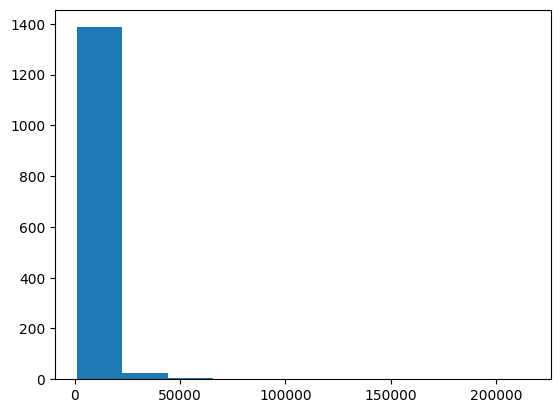

In [11]:
plt.hist(data = df, x = "LotArea", bins = 10)

(array([205., 643., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <BarContainer object of 10 artists>)

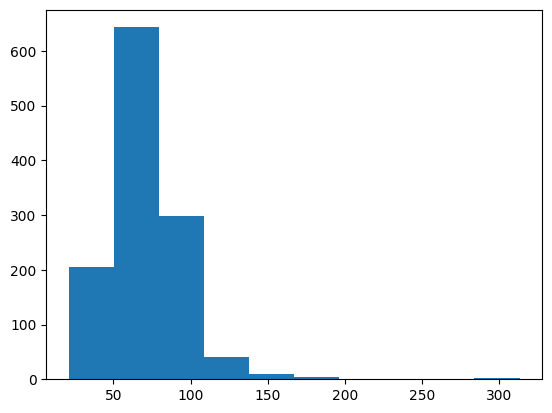

In [12]:
plt.hist(data = df, x = "LotFrontage", bins = 10)

In [13]:
df['LotArea'] = df['LotArea'].fillna(df['LotArea'].median())

In [14]:
df['LotArea'].dtype

dtype('float64')

In [15]:
df['LotArea'].isnull().sum()

0

In [16]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [17]:
df['LotFrontage'].isnull().sum()

0

In [18]:
df['BsmtCond'].mode()[0]

'TA'

In [24]:
df['BsmtCond'].isnull().sum()

0

In [25]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [26]:
df['BsmtCond'].isnull().sum()

0

In [27]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [28]:
df['BsmtExposure'].isnull().sum()

0

In [29]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

In [30]:
df['BsmtFinType1'].isnull().sum()

0

In [31]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [32]:
df['BsmtFinType2'].isnull().sum()

0

In [33]:
df.isnull().sum()

Id                    0
Neighborhood          0
LotFrontage           0
LotArea               0
number of bedrooms    1
Street                0
OverallQual           0
OverallCond           0
Date                  0
BsmtCond              0
BsmtExposure          0
BsmtFinType1          0
BsmtFinSF1            0
BsmtFinType2          0
BsmtFinSF2            0
BsmtUnfSF             0
SquareFootage         0
Heating               0
HeatingQC             0
SaleType              0
SaleCondition         0
Price                 0
dtype: int64

In [34]:
df['number of bedrooms'] = df['number of bedrooms'].fillna(df['number of bedrooms'].mode()[0])

In [35]:
df.isnull().sum()

Id                    0
Neighborhood          0
LotFrontage           0
LotArea               0
number of bedrooms    0
Street                0
OverallQual           0
OverallCond           0
Date                  0
BsmtCond              0
BsmtExposure          0
BsmtFinType1          0
BsmtFinSF1            0
BsmtFinType2          0
BsmtFinSF2            0
BsmtUnfSF             0
SquareFootage         0
Heating               0
HeatingQC             0
SaleType              0
SaleCondition         0
Price                 0
dtype: int64

In [36]:
df.shape

(1460, 22)

In [37]:
df['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [209]:
enc = OneHotEncoder(handle_unknown='ignore')

In [40]:
enc.fit(df[['SaleCondition']])

OneHotEncoder(handle_unknown='ignore')

In [41]:
enc.categories_

[array(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'],
       dtype=object)]

In [68]:
df[['Neighborhood']].value_counts()

Neighborhood
RL              1151
RM               218
FV                65
RH                16
C (all)           10
Name: count, dtype: int64

In [75]:
OHE = OneHotEncoder(drop = 'first', sparse_output = False)

In [78]:
df[['Street']].value_counts()

Street
Pave      1454
Grvl         6
Name: count, dtype: int64

In [79]:
df.dtypes

Id                      int64
Neighborhood           object
LotFrontage           float64
LotArea               float64
number of bedrooms    float64
Street                 object
OverallQual             int64
OverallCond             int64
Date                    int64
BsmtCond               object
BsmtExposure           object
BsmtFinType1           object
BsmtFinSF1              int64
BsmtFinType2           object
BsmtFinSF2              int64
BsmtUnfSF               int64
SquareFootage           int64
Heating                object
HeatingQC              object
SaleType               object
SaleCondition          object
Price                   int64
dtype: object

In [210]:
transformer = ColumnTransformer(transformers = [
    ('tnf1', OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown='ignore'), ['Neighborhood','Street', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'SaleType','SaleCondition'])
], remainder = 'passthrough')

In [211]:
c = df[['Neighborhood','Street', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'SaleType','SaleCondition']]

In [212]:
transformer.fit(c)

ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Neighborhood', 'Street', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'SaleType', 'SaleCondition'])])

In [213]:
col = transformer.named_transformers_['tnf1'].get_feature_names_out()

In [214]:
encoded = transformer.transform(c)


In [215]:
encoded_df = pd.DataFrame(encoded, columns= col)


In [216]:
encoded_df.head()

,Neighborhood_FV,Neighborhood_RH,Neighborhood_RL,Neighborhood_RM,Street_Pave,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [217]:
numeric_df = df[['Id','LotFrontage','LotArea','number of bedrooms','OverallQual','OverallCond','Date','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','SquareFootage','Price']]

In [218]:
encoded_df.reset_index(drop=True, inplace=True)
numeric_df.reset_index(drop=True, inplace=True)

In [219]:
final_df = pd.concat([encoded_df, numeric_df], axis = 1)

In [220]:
final_df.head()

,Neighborhood_FV,Neighborhood_RH,Neighborhood_RL,Neighborhood_RM,Street_Pave,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,...,LotArea,number of bedrooms,OverallQual,OverallCond,Date,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,SquareFootage,Price
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,8450.0,2.0,7,5,2003,706,0,150,856,208500
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,9600.0,3.0,6,8,1976,978,0,284,1262,181500
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,11250.0,3.0,7,5,2001,486,0,434,920,223500
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,9550.0,3.0,7,5,1915,216,0,540,756,140000
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,9475.0,2.0,8,5,2000,655,0,490,1145,250000


In [221]:
final_df.isnull().sum()

Neighborhood_FV          0
Neighborhood_RH          0
Neighborhood_RL          0
Neighborhood_RM          0
Street_Pave              0
BsmtCond_Gd              0
BsmtCond_Po              0
BsmtCond_TA              0
BsmtExposure_Gd          0
BsmtExposure_Mn          0
BsmtExposure_No          0
BsmtFinType1_BLQ         0
BsmtFinType1_GLQ         0
BsmtFinType1_LwQ         0
BsmtFinType1_Rec         0
BsmtFinType1_Unf         0
BsmtFinType2_BLQ         0
BsmtFinType2_GLQ         0
BsmtFinType2_LwQ         0
BsmtFinType2_Rec         0
BsmtFinType2_Unf         0
Heating_GasA             0
Heating_GasW             0
Heating_Grav             0
Heating_OthW             0
Heating_Wall             0
HeatingQC_Fa             0
HeatingQC_Gd             0
HeatingQC_Po             0
HeatingQC_TA             0
SaleType_CWD             0
SaleType_Con             0
SaleType_ConLD           0
SaleType_ConLI           0
SaleType_ConLw           0
SaleType_New             0
SaleType_Oth             0
S

In [222]:
df.columns

Index(['Id', 'Neighborhood', 'LotFrontage', 'LotArea', 'number of bedrooms',
       'Street', 'OverallQual', 'OverallCond', 'Date', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'SquareFootage', 'Heating', 'HeatingQC',
       'SaleType', 'SaleCondition', 'Price'],
      dtype='object')

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
X = final_df.drop('Price',axis = 1)

In [225]:
y = final_df['Price']

In [226]:
X

,Neighborhood_FV,Neighborhood_RH,Neighborhood_RL,Neighborhood_RM,Street_Pave,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,...,LotFrontage,LotArea,number of bedrooms,OverallQual,OverallCond,Date,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,SquareFootage
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,65.0,8450.0,2.0,7,5,2003,706,0,150,856
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,80.0,9600.0,3.0,6,8,1976,978,0,284,1262
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,68.0,11250.0,3.0,7,5,2001,486,0,434,920
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,60.0,9550.0,3.0,7,5,1915,216,0,540,756
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,84.0,9475.0,2.0,8,5,2000,655,0,490,1145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,62.0,7917.0,3.0,6,5,1999,0,0,953,953
1456,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,85.0,13175.0,4.0,6,6,1978,790,163,589,1542
1457,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,66.0,9042.0,3.0,7,9,1941,275,0,877,1152
1458,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,68.0,9475.0,3.0,5,6,1950,49,1029,0,1078


In [227]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: Price, Length: 1460, dtype: int64

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42)

In [229]:
from sklearn.linear_model import LinearRegression

In [230]:
lr = LinearRegression()

In [231]:
lr.fit(X_train, y_train)

LinearRegression()

In [232]:
X_test

,Neighborhood_FV,Neighborhood_RH,Neighborhood_RL,Neighborhood_RM,Street_Pave,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,...,LotFrontage,LotArea,number of bedrooms,OverallQual,OverallCond,Date,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,SquareFootage
892,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,70.0,8414.0,4.0,6,8,1963,663,0,396,1059
1105,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,98.0,12256.0,4.0,8,5,1994,1032,0,431,1463
413,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,56.0,8960.0,3.0,5,6,1927,0,0,1008,1008
522,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,50.0,5000.0,2.0,6,7,1947,399,0,605,1004
1036,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,89.0,12898.0,3.0,9,5,2007,1022,0,598,1620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,50.0,5925.0,2.0,4,7,1937,168,0,739,907
1361,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,124.0,16158.0,4.0,7,5,2005,1274,0,256,1530
802,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,63.0,8199.0,4.0,7,5,2005,648,0,80,728
651,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,60.0,9084.0,3.0,4,5,1940,0,0,755,755


In [233]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
802     189000
651     108000
722     124500
Name: Price, Length: 292, dtype: int64

In [234]:
lr.predict([X_test.iloc[0]])

C:\Users\patel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([185822.73862526])

In [235]:
b = lr.intercept_

In [236]:
m = lr.coef_

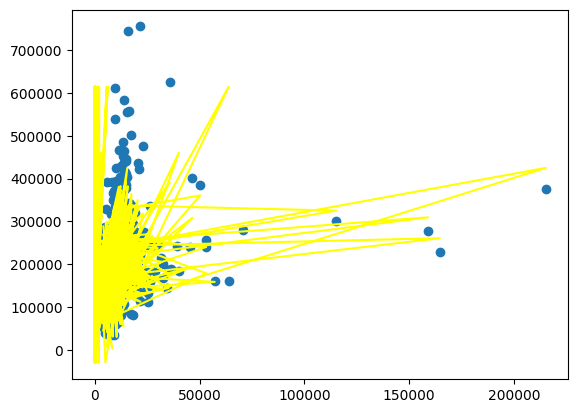

In [237]:
plt.scatter(x = "LotArea", y = "Price", data = df)
plt.plot(X_train, lr.predict(X_train), color = 'yellow')

In [238]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: Price, Length: 1460, dtype: int64

In [239]:
r2_score = lr.score(X_test, y_test)

In [240]:
r2_score

0.7425715590897621

In [241]:
y_pred = lr.predict(X_test)

In [242]:
y_pred

array([185822.73862526, 274495.41375239, 112587.83770128, 158939.90924728,
       324971.48619821,  89441.78072598, 218669.52796576, 156006.66618587,
        73590.22202611, 133348.55068519, 192548.99755722, 127135.95231394,
        12719.72548785, 221740.69987975, 167840.74068468, 138101.44897336,
       201347.01452347, 129589.29132967, 138710.11360201, 238269.37708331,
       132000.96288457, 223097.84071585, 175063.53565961, 143226.39348928,
       227792.36764604, 185875.72112362, 244029.72299759, 118090.13269131,
       178520.02858532, 216141.23115515, 127318.72478902, 226547.58404441,
       143816.38535931, 112320.30750981, 263951.78853342, 171751.49048971,
       115935.58007794, 204372.62103126, 268518.21853447,  91793.34937981,
       137125.16410329, 220039.94912785, 125514.76636409, 292335.87324559,
       132843.03460365, 155562.65730565, 117019.97265776, 151600.42395583,
       360568.01090598, 139456.38481386, 134497.51054288, 209125.98373291,
        98138.4482504 , 2

In [243]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [244]:
MAE = mean_absolute_error(y_test, y_pred)

In [245]:
MAE

28883.672921192487

In [246]:
MSE = mean_squared_error(y_test, y_pred)

In [247]:
MSE

1974560116.7891197

In [248]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [249]:
MAPEs

0.17980943030326613